In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [12]:
data=pd.read_csv("C:\\Users\\Asus\\Downloads\\USA_Housing-1.csv")

In [32]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


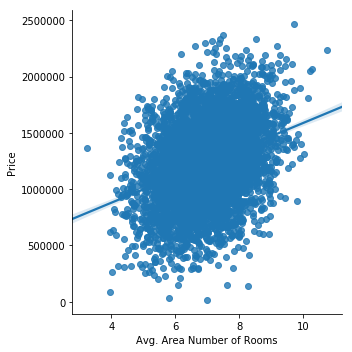

In [31]:

sns.lmplot(x="Avg. Area Number of Rooms",y="Price",data=data)





Step -1 :
    find the x bar and y bar that are mean of x and y

step -2 :
    calculate the sum of (difference between the x(i) with the xbar and difference of y(i) with ybar)

step -3 :
    multiply the above obtained values

step -4 :
    take the sum of (x-xbar)^2

step -5 :
    divide the step 3 value with step 4 value, and the above result will give us the slope of the best fit line.
    
    

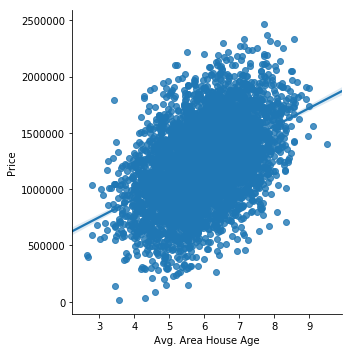

In [79]:
sns.lmplot(x="Avg. Area House Age",y="Price",data=data)


## First machine learning model :
    
#    Linear Regression

library to be used : 
    
    from sklearn.linear_model import LinearRegression


In [35]:
from sklearn.linear_model import LinearRegression

## initiate the machine 
lr=LinearRegression()

# Points to be considered

1. Remove or convert Cat. Variables

2. Generalisation of data is very important

 

In [36]:
# drop the cat variable
data.drop("Address",axis=1,inplace=True)

In [37]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [60]:
# splitting data in train and test
from sklearn.model_selection import train_test_split

# Defining the x and y

x=data.drop("Price",axis=1)
y=data.Price

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)     # 0.30 or 30% is the size of test


In [61]:
xtrain.shape

(3500, 5)

In [62]:
xtest.shape

(1500, 5)

In [63]:
ytrain.shape

(3500,)

In [64]:
ytest.shape

(1500,)

In [69]:
# Deploying model
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
y_hat=lr.predict(xtest)
y_hat

array([ 791123.50601199,  697223.19909038, 1414478.55192478, ...,
       1646511.06160969,  592560.9550149 ,  979949.89008275])

In [71]:
# R square and RMSE

from sklearn.metrics import r2_score, mean_squared_error

r2_score(ytest,y_hat)   # it shows the accuray of our model which is 91 % in our model

0.9193832647798597

In [75]:
np.sqrt(mean_squared_error(ytest,y_hat)) # the above value represents that our predicted value is 102418 dollars away from the actual value hence it is not a good model to use.

102418.93543581417

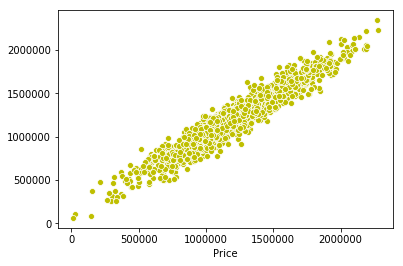

In [77]:
sns.scatterplot(ytest,y_hat,color="y")